https://www.dataquest.io/blog/pandas-concatenation-tutorial/

In [1]:
import requests

req = requests.get('https://www.dataquest.io/blog/large_files/PandasConcatTutorial.zip')

In [4]:
open('PandasConcatTutorial.zip', 'wb').write(req.content)

8279

In [5]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "PandasConcatTutorial.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Pandas Concatenation Tutorial/north_america_2000_2010.csv 2018-01-18 13:28:44          268
Pandas Concatenation Tutorial/americas_2014.csv 2018-01-18 13:28:42           66
Pandas Concatenation Tutorial/europe_2000_2015.csv 2018-01-18 13:28:40         2742
Pandas Concatenation Tutorial/historical.csv   2018-01-18 13:28:38         6742
Pandas Concatenation Tutorial/americas_2015.csv 2018-01-18 13:28:34           66
Pandas Concatenation Tutorial/americas_2011.csv 2018-01-18 13:28:36           66
Pandas Concatenation Tutorial/asia_2000_2015.csv 2018-01-18 13:28:34          439
Pandas Concatenation Tutorial/americas_2012.csv 2018-01-18 13:28:32           64
Pandas Concatenation Tutorial/americas_2013.csv 2018-01-18 13:28:30           66
Pandas Concatenation Tutorial/south_america_2000_2010.csv 2018-01-18 13:28:28          128
Pandas Concatenation Tutorial/south_pacific_2000_2015.csv 2018-01-18 13:28:26          

In [7]:
!ls Pandas\ Concatenation\ Tutorial

americas_2011.csv           europe_2000_2015.csv
americas_2012.csv           historical.csv
americas_2013.csv           north_america_2000_2010.csv
americas_2014.csv           south_america_2000_2010.csv
americas_2015.csv           south_pacific_2000_2015.csv
asia_2000_2015.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
north_america = pd.read_csv('Pandas Concatenation Tutorial/north_america_2000_2010.csv', index_col=0)
south_america = pd.read_csv('Pandas Concatenation Tutorial/south_america_2000_2010.csv', index_col=0)

In [22]:
north_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0


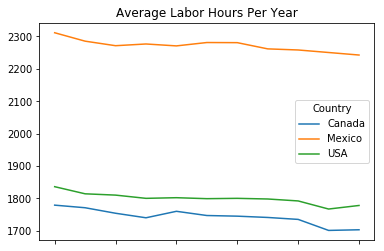

In [25]:
north_america.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

In [23]:
south_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Chile,2263,2242,2250,2235,2232,2157,2165,2128,2095,2074,2069.6


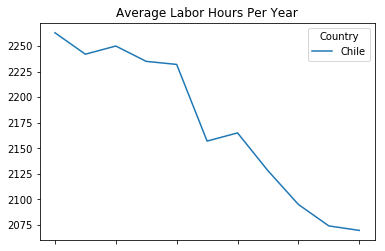

In [26]:
south_america.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

In [27]:
americas = pd.concat([north_america, south_america])
americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6


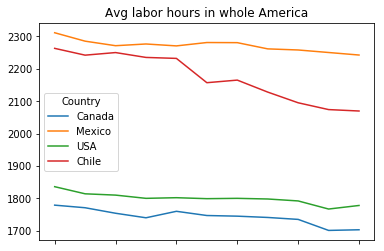

In [29]:
americas.transpose().plot(title='Avg labor hours in whole America')

In [30]:
americas_dfs = [americas]

for year in range(2011, 2016):
    filename = "Pandas Concatenation Tutorial/americas_{}.csv".format(year)
    df = pd.read_csv(filename, index_col=0)
    americas_dfs.append(df)
    
americas_dfs[1]

,2011
Country,
Canada,1700.0
Chile,2047.4
Mexico,2250.2
USA,1786.0


In [31]:
americas = pd.concat(americas_dfs, axis=1)
americas.index.names = ['Country']
americas

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0


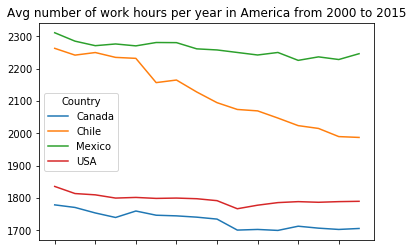

In [32]:
americas.transpose().plot(title='Avg number of work hours per year in America from 2000 to 2015')

In [33]:
asia = pd.read_csv('Pandas Concatenation Tutorial/asia_2000_2015.csv', index_col=0)
asia

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Israel,2017,1979,1993,1974,1942,1931,1919,1931,1929,1927,1918,1920,1910,1867,1853,1858
Japan,1821,1809,1798,1799,1787,1775,1784,1785,1771,1714,1733,1728,1745,1734,1729,1719
Korea,2512,2499,2464,2424,2392,2351,2346,2306,2246,2232,2187,2090,2163,2079,2124,2113
Russia,1982,1980,1982,1993,1993,1989,1998,1999,1997,1974,1976,1979,1982,1980,1985,1978


In [37]:
europe = pd.read_csv('Pandas Concatenation Tutorial/europe_2000_2015.csv', index_col=0)
europe.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Austria,1807.4,1794.6,1792.2,1783.8,1786.8,1764.0,1746.2,1736.0,1728.5,1673.0,1668.6,1675.9,1652.9,1636.7,1629.4,1624.9
Belgium,1595.0,1588.0,1583.0,1578.0,1573.0,1565.0,1572.0,1577.0,1570.0,1548.0,1546.0,1560.0,1560.0,1558.0,1560.0,1541.0
Switzerland,1673.6,1635.0,1614.0,1626.8,1656.5,1651.7,1643.2,1632.7,1623.1,1614.9,1612.4,1605.4,1590.9,1572.9,1568.3,1589.7
Czech Republic,1896.0,1818.0,1816.0,1806.0,1817.0,1817.0,1799.0,1784.0,1790.0,1779.0,1800.0,1806.0,1776.0,1763.0,1771.0,1779.0
Germany,1452.0,1441.9,1430.9,1424.8,1422.2,1411.3,1424.7,1424.4,1418.4,1372.7,1389.9,1392.8,1375.3,1361.7,1366.4,1371.0


In [38]:
south_pacific = pd.read_csv('Pandas Concatenation Tutorial/south_pacific_2000_2015.csv', index_col=0)
south_pacific

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Australia,1778.7,1736.7,1731.7,1735.8,1734.5,1729.2,1720.5,1712.5,1717.2,1690,1691.5,1699.5,1678.6,1662.7,1663.6,1665
New Zealand,1836.0,1825.0,1826.0,1823.0,1830.0,1815.0,1795.0,1774.0,1761.0,1740,1755.0,1746.0,1734.0,1752.0,1762.0,1757


In [42]:
world = americas.append([asia, europe, south_pacific])
world.index

Index(['Canada', 'Chile', 'Mexico', 'USA', 'Israel', 'Japan', 'Korea',
       'Russia', 'Austria', 'Belgium', 'Switzerland', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden', 'Australia',
       'New Zealand'],
      dtype='object', name='Country')

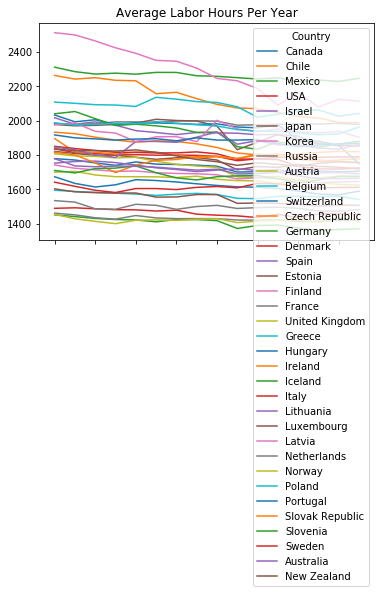

In [43]:
world.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

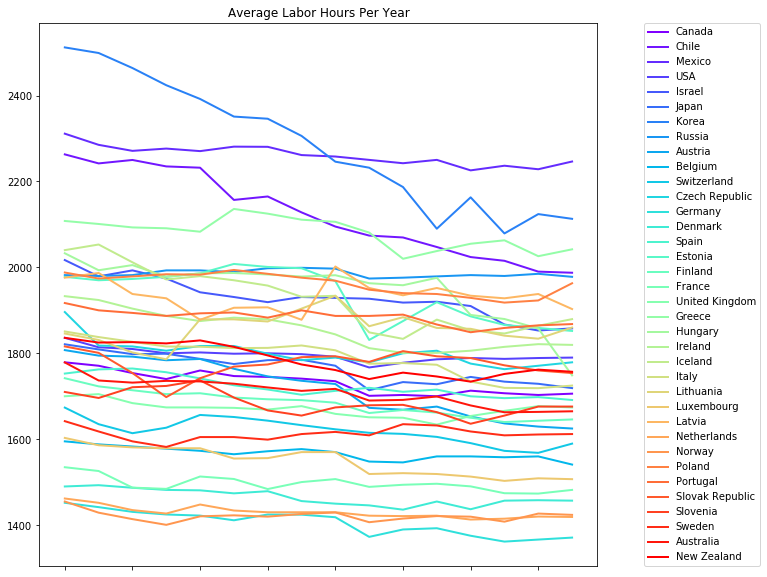

In [44]:
world.transpose().plot(figsize=(10,10), colormap='rainbow', linewidth=2, title='Average Labor Hours Per Year')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [45]:
historical = pd.read_csv('Pandas Concatenation Tutorial/historical.csv', index_col=0)
historical.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779.5,1774.90,1773.70,1786.50,1797.60,1793.400,1782.700,1783.600,1768.40,1778.8
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1619.200,1637.150,1648.500,1641.65,1654.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1662.9,1625.79,1602.72,1558.59,1558.59,1515.835,1500.295,1510.315,1513.33,1514.5
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.5,1767.50,1766.00,1764.50,1773.00,1771.500,1786.500,1782.500,1778.50,1778.5
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.10,1684.80,1685.80,1706.20,1685.500,1658.900,1648.600,1656.60,1678.4


In [46]:
print("World rows & columns: ", world.shape)
print("Historical rows & columns: ", historical.shape)

World rows & columns:  (36, 16)
Historical rows & columns:  (39, 50)


In [47]:
world_historical = pd.merge(historical, world, left_index=True, right_index=True, how='right')
print(world_historical.shape)
world_historical.head()

(36, 66)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


In [48]:
world_historical = historical.join(world, how='right')
world_historical.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


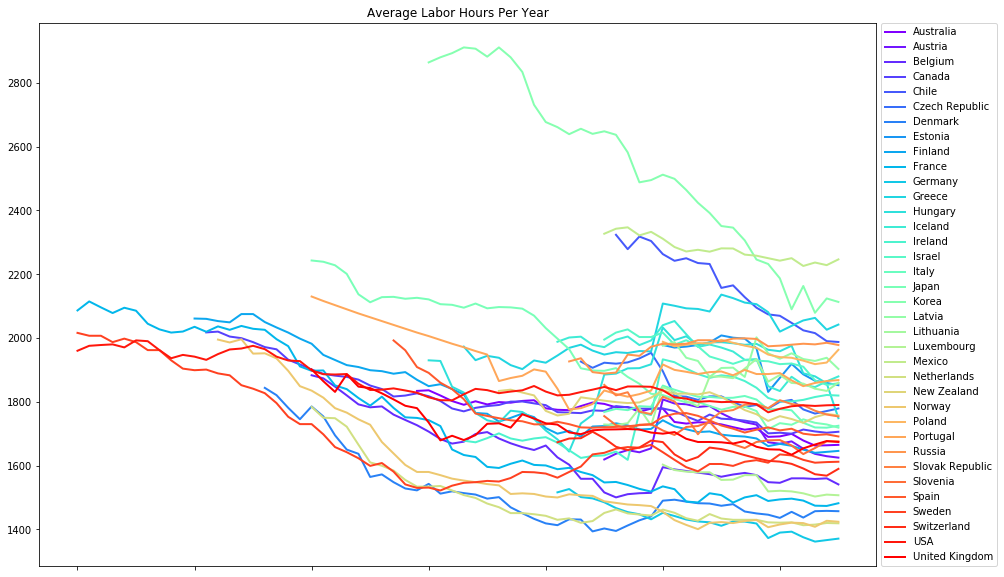

In [49]:
world_historical.sort_index(inplace=True)
world_historical.transpose().plot(figsize=(15,10), colormap='rainbow', linewidth=2, title='Average Labor Hours Per Year')
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
plt.show()